In [120]:
import numpy as np
from matplotlib import pyplot as plt
import PhysicsFunctions


In [121]:
#Initial Data
voltage = np.array([2, 2.20, 2.40, 2.60, 2.80, 3, 3.20, 3.40, 3.60, 3.80, 4]) * (10 ** (3)) 
n1_diameter_inner = np.array([3.19, 3.05, 3.00, 2.64, 2.59, 2.50, 2.39, 2.33, 2.25, 2.17, 2.12]) * (10 ** (-2))
n1_hypotenuse = np.array([1.57, 1.50, 1.50, 1.34, 1.29, 1.21, 1.22, 1.22, 1.15, 1.02, 1.01]) * (10 ** (-2))
n1_width = np.array([0.39, 0.29, 0.30, 0.21, 0.22, 0.28, 0.24, 0.21, 0.19, 0.17, 0.17]) * (10 ** (-2))
n2_diameter_inner = np.array([5.68, 5.28, 5.18, 4.83, 4.56, 4.34, 4.36, 4.18, 4.03, 3.91, 3.82]) * (10 ** (-2))
n2_hypotenuse = np.array([2.84, 2.64, 2.64, 2.36, 2.42, 2.25, 2.18, 1.99, 2, 1.88, 1.90]) * (10 ** (-2))
n2_width = np.array([0.62, 0.50, 0.40, 0.33, 0.32, 0.32, 0.33, 0.30, 0.25, 0.22, 0.21]) * (10 ** (-2))

measurement_unc = 0.00005 #Uncertainty from calipers
voltage_unc = 25 #Volts

electron_mass = (0.510999 * (10 ** 6)) / ((2.99792 * (10 ** 8)) ** 2) #eV/c^2
electron_charge = 1 #Elementary Charge

length = 0.125 #meters
length_unc = 0.002 #meters

lattice_constant_10 = 0.213 * (10 ** (-9))
lattice_constant_11 = 0.123 * (10 ** (-9))

In [122]:
n1_diameter_center = []
n2_diameter_center = []

for i in range(len(voltage)):
    n1_diameter_center.append(n1_diameter_inner[i] + n1_width[i])
    n2_diameter_center.append(n2_diameter_inner[i] + n2_width[i])

n1_diameter_center = np.array(n1_diameter_center)
n2_diameter_center = np.array(n2_diameter_center)


n1_hypotenuse_center = []
n2_hypotenuse_center = []

for i in range(len(voltage)):
    n1_hypotenuse_center.append(n1_hypotenuse[i] + n1_width[i])
    n2_hypotenuse_center.append(n2_hypotenuse[i] + n2_width[i])

n1_hypotenuse_center = np.array(n1_hypotenuse_center)
n2_hypotenuse_center = np.array(n2_hypotenuse_center)

In [123]:
a = np.sqrt((n1_hypotenuse_center ** 2) - ((n1_diameter_center / 2) ** 2))
length_n1 = length - a

Error Analysis for n=1 Case

In [124]:
λ10n1_worst = lattice_constant_10 * ((n1_diameter_center + measurement_unc) / 2) / ((length - length_unc) - (np.sqrt(((n1_hypotenuse_center+measurement_unc) ** 2) - (((n1_diameter_center-measurement_unc) / 2) ** 2))))

λ11n1_worst = lattice_constant_11 * ((n1_diameter_center + measurement_unc) / 2) / ((length - length_unc) - (np.sqrt(((n1_hypotenuse_center+measurement_unc) ** 2) - (((n1_diameter_center-measurement_unc) / 2) ** 2))))

momentum_n1_worst = np.sqrt(2 * electron_mass * (voltage + voltage_unc))


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 11
    # variables        = 2
    chi-square         = 5.0589e-24
    reduced chi-square = 5.6210e-25
    Akaike info crit   = -612.426715
    Bayesian info crit = -611.630925
    R-squared          = 0.99999999
[[Variables]]
    slope:  6.3883e-15 +/- 3.7206e-16 (5.82%) (init = 1)
    b:     -1.0091e-11 +/- 2.0625e-12 (20.44%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, b) = -0.9940
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 11
    # variables        = 2
    chi-square         = 1.6870e-24
    reduced chi-square = 1.8744e-25
    Akaike info crit   = -624.507087
    Bayesian info crit = -623.711297
    R-squared          = 1.00000000
[[Variables]]
    slope:  3.6890e-15 +/- 2.1485e-16 (5.82%) (init = 1)
    b:     -5.8271e-12 +/- 1.1910e-12 (20.44%) (init = 0)
[[Correlations]] (unreporte

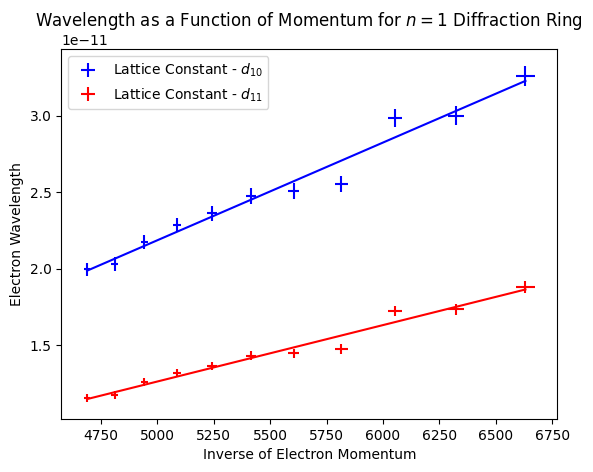

In [125]:
λ10n1 = lattice_constant_10 * (n1_diameter_center / 2) / length_n1
λ11n1 = lattice_constant_11 * (n1_diameter_center / 2) / length_n1
momentum = np.sqrt(2 * electron_mass * electron_charge * voltage)

fig, ax = plt.subplots()
fig.suptitle(None)
ax.set_title("Wavelength as a Function of Momentum for $n=1$ Diffraction Ring")
ax.set_ylabel("Electron Wavelength")
ax.set_xlabel("Inverse of Electron Momentum")

λ10n1_error = abs(λ10n1_worst - λ10n1)
λ11n1_error = abs(λ11n1_worst - λ11n1)
inverse_momentum_n1_error = abs((1 / momentum_n1_worst) - (1 / momentum))

plt.errorbar(1 / momentum, λ10n1, λ10n1_error, inverse_momentum_n1_error, label="Lattice Constant - $d_{10}$", fmt="none", marker=".", color="blue")
plt.errorbar(1 / momentum, λ11n1, λ11n1_error, inverse_momentum_n1_error, label="Lattice Constant - $d_{11}$", fmt="none", marker=".", color="red")
slope1, _ = PhysicsFunctions.fitLinear(1 / momentum,λ10n1)
slope2, _ = PhysicsFunctions.fitLinear(1 / momentum,λ11n1)
plt.plot(1 / momentum, slope1, color="blue")
plt.plot(1 / momentum, slope2, color="red")
plt.legend()


In [126]:
b = np.sqrt((n2_hypotenuse_center ** 2) - ((n2_diameter_center / 2) ** 2))
length_n2 = length - b

Error analysis for n=2 case

In [127]:
λ10n2_worst = lattice_constant_10 * ((n2_diameter_center + measurement_unc) / 2) / ((length - length_unc) - (np.sqrt(((n2_hypotenuse_center+measurement_unc) ** 2) - (((n2_diameter_center-measurement_unc) / 2) ** 2))))

λ11n2_worst = lattice_constant_11 * ((n2_diameter_center + measurement_unc) / 2) / ((length - length_unc) - (np.sqrt(((n2_hypotenuse_center+measurement_unc) ** 2) - (((n2_diameter_center-measurement_unc) / 2) ** 2))))

momentum_n2_worst = np.sqrt(2 * electron_mass * (voltage + voltage_unc))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 11
    # variables        = 2
    chi-square         = 1.1124e-23
    reduced chi-square = 1.2360e-24
    Akaike info crit   = -603.758826
    Bayesian info crit = -602.963036
    R-squared          = 0.99999999
[[Variables]]
    slope:  1.2322e-14 +/- 5.5172e-16 (4.48%) (init = 1)
    b:     -2.2612e-11 +/- 3.0585e-12 (13.53%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, b) = -0.9940
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 11
    # variables        = 2
    chi-square         = 3.7096e-24
    reduced chi-square = 4.1218e-25
    Akaike info crit   = -615.839198
    Bayesian info crit = -615.043407
    R-squared          = 1.00000000
[[Variables]]
    slope:  7.1154e-15 +/- 3.1860e-16 (4.48%) (init = 1)
    b:     -1.3058e-11 +/- 1.7662e-12 (13.53%) (init = 0)
[[Correlations]] (unreporte

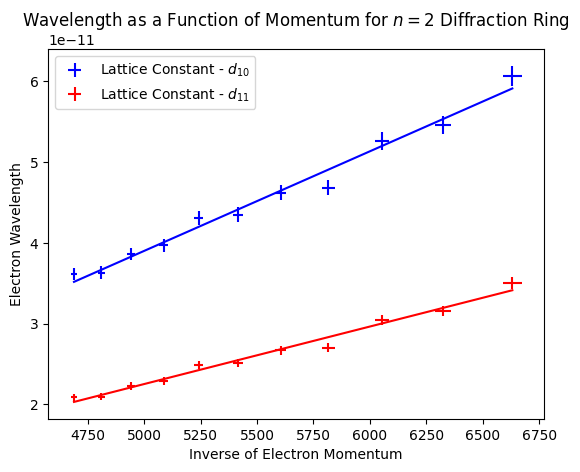

In [128]:
λ10n2 = lattice_constant_10 * (n2_diameter_center / 2) / length_n2
λ11n2 = lattice_constant_11 * (n2_diameter_center / 2) / length_n2
momentum = np.sqrt(2 * electron_mass * electron_charge * voltage)

fig, ax = plt.subplots()
fig.suptitle(None)
ax.set_title("Wavelength as a Function of Momentum for $n=2$ Diffraction Ring")
ax.set_ylabel("Electron Wavelength")
ax.set_xlabel("Inverse of Electron Momentum")

λ10n2_error = abs(λ10n2_worst - λ10n2)
λ11n2_error = abs(λ11n2_worst - λ11n2)
inverse_momentum_n2_error = abs((1 / momentum_n2_worst) - (1 / momentum))

plt.errorbar(1 / momentum, λ10n2, λ10n2_error, inverse_momentum_n2_error, label="Lattice Constant - $d_{10}$", fmt="none", marker=".", color="blue")
plt.errorbar(1 / momentum, λ11n2, λ11n2_error, inverse_momentum_n2_error, label="Lattice Constant - $d_{11}$", fmt="none", marker=".", color="red")
slope1, _ = PhysicsFunctions.fitLinear(1 / momentum,λ10n2)
slope2, _ = PhysicsFunctions.fitLinear(1 / momentum,λ11n2)
plt.plot(1 / momentum, slope1, color="blue")
plt.plot(1 / momentum, slope2, color="red")
plt.legend()
